# Air quality Prediction

# Dataset : Air quality of an Italian city


# Problem Definition



Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling ­us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out. 
So we will predict the Relative Humidity of a given point of time based on the all other attributes affecting the change in RH.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import  RandomForestRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.model_selection import cross_val_predict,train_test_split,KFold
from sklearn.metrics import accuracy_score,auc,confusion_matrix,explained_variance_score
from sklearn.metrics import f1_score,mean_squared_error,precision_score,mean_squared_log_error
from sklearn.grid_search import GridSearchCV
from IPython.core.interactiveshell import InteractiveShell
from sklearn.decomposition import PCA
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# Import dataset

In [14]:
path='C:/MyDocuments/MyDcuments/Personal/DataScience/My/UPX/Machine Learning/Projects/Airquality'
df=pd.read_csv(path+'/AirQualityUCI.csv')

df.describe()
df.info()
df.head()
df.tail()
df.isnull().any().any()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


True

# Data Cleanup and Wrangling 

In [12]:
#Drop constant value columns with single unique value
columns_to_remove = [col for col in df.columns if df[col].nunique() == 1]

In [15]:
# Drop dummy and blank columns
df.drop(['Unnamed: 15','Unnamed: 16'],inplace=True,axis=1,)
# # Drop rows having NaN values
# Get rows,columns having any NaN
nans = lambda df: df[df.isnull().any(axis=1)]
df_nans=nans(df)
#drop rows having NaN for all Features  
df.dropna(axis=0,inplace=True,thresh=15)

In [16]:
# Fetaure Engineering of DateTime fields
df['Day']=pd.to_datetime(df['Date']).dt.day
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Time']=pd.to_datetime(df['Time'],format= '%H:%M:%S' ).dt.hour

In [17]:
#Handling dummy values (-200) using Imputation 
df.head()
df_features_Col=['Day','Month','Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH']
df_features=pd.DataFrame(df[df_features_Col])

fill_200 = Imputer(missing_values=-200, strategy='mean')
imputed_DF = pd.DataFrame(fill_200.fit_transform(df_features))
imputed_DF.columns=df_features.columns
imputed_DF.head()

X=imputed_DF.iloc[:,0:len(imputed_DF.columns)-2]
Y=imputed_DF.iloc[:,len(imputed_DF.columns)-1]

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Day,Month
0,3/10/2004,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,10,3
1,3/10/2004,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,10,3
2,3/10/2004,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,10,3
3,3/10/2004,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,10,3
4,3/10/2004,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,10,3


,Day,Month,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10.0,3.0,18.0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10.0,3.0,19.0,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10.0,3.0,20.0,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10.0,3.0,21.0,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10.0,3.0,22.0,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


# Exploratory Data Analysis

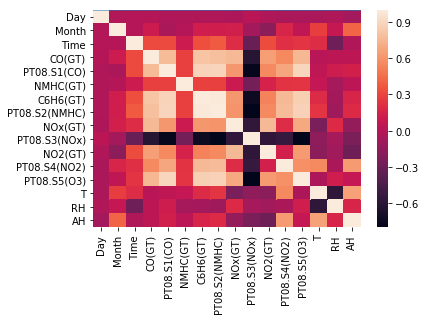

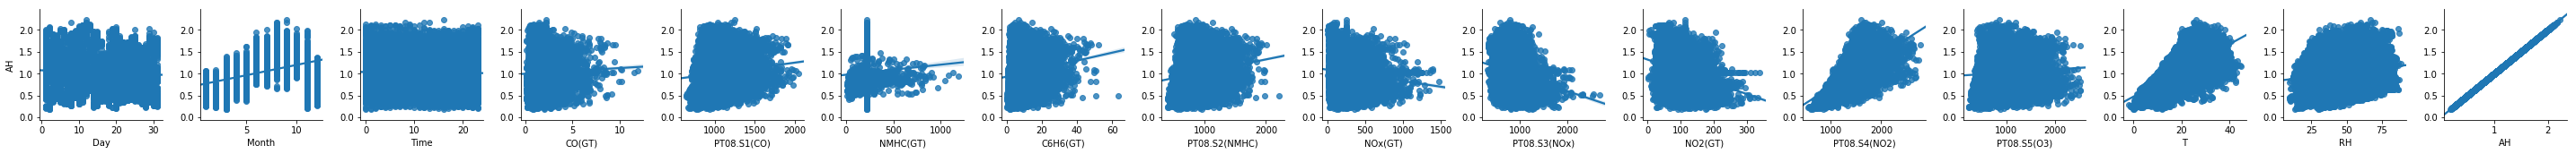

In [19]:

# Plot Correlation among different features 
sns.heatmap(imputed_DF.corr())
sns.pairplot(imputed_DF, x_vars=df_features_Col, y_vars='AH', kind='reg')


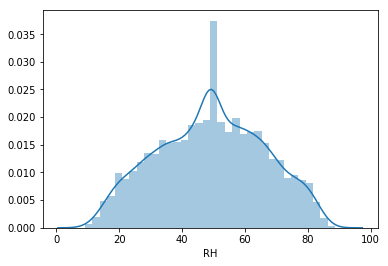

In [22]:
# Plot  distribution of Target Label RH
sns.distplot(imputed_DF['RH'] )

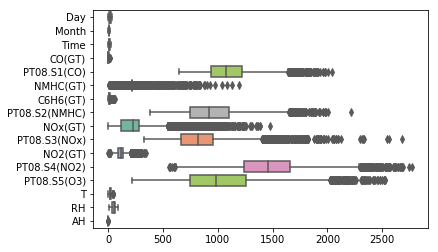

In [23]:
sns.boxplot(data=imputed_DF, orient="h", palette="Set2")

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

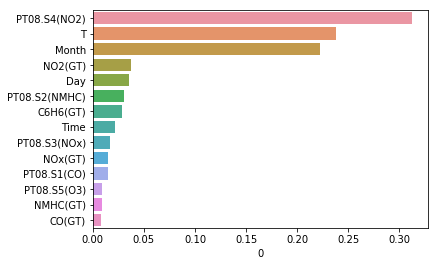

In [42]:
# feature Importance
model = ExtraTreesRegressor()
model.fit(X, Y)
importance=pd.DataFrame( model.feature_importances_, index=X.columns).sort_values(by=[0], ascending=False)
sns.barplot( x=importance[0], y= importance.index)

# Data Preparation : Train Test Split

In [44]:
# Train Test Split of data

Xtrain,Xtest,ytrain,ytest=train_test_split(imputed_DF,Y,test_size=.3)

# Null Hypothesis : Baseline RMSE

In [45]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123)
# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)
# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
rmse_null=np.sqrt(mean_squared_error(y_test, y_null))

# Model Deployment - Linear Regression

In [46]:
lm=LinearRegression()
lm.fit(Xtrain,ytrain)
lm_y_Preds=lm.predict(X=Xtest)
lm_rmse=np.sqrt(mean_squared_error(y_pred=lm_y_Preds,y_true=ytest))
lm_r2=metrics.r2_score(ytest,lm_y_Preds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Deployment - Random Forest

In [47]:
rf=RandomForestRegressor(max_depth=100,n_estimators=500)
rf.fit(Xtrain,ytrain)
rf_pred=rf.predict(Xtest)
rf_rmse=np.sqrt(mean_squared_error(y_pred=rf_pred,y_true=ytest))
rf_r2=metrics.r2_score(ytest,rf_pred)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Model Deployment - Support Vector Machine

In [48]:
svr=SVR()
svr.fit(Xtrain,ytrain)
svr_pred=svr.predict(Xtest)
svr_rmse=np.sqrt(mean_squared_error(y_pred=svr_pred,y_true=ytest))
svr_r2=metrics.r2_score(ytest,svr_pred)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Model Prediction Comparision : RMSE

In [49]:
print ( 'Null Hypothesis RMSE: '+str(rmse_null))
print ( 'Liner Regression RMSE: '+str(lm_rmse))
print ( 'Random Forest RMSE: '+str(rf_rmse))
print ( 'SVM RMSE: '+str(svr_rmse))
print ( 'Linear Regression R2: '+str(lm_r2))
print ( 'Random Forest R2: '+str(rf_r2))
print ( 'SVM R2: '+str(svr_r2))

Null Hypothesis RMSE: 0.389679791386
Liner Regression RMSE: 4.8787441047e-15
Random Forest RMSE: 0.00118979170253
SVM RMSE: 0.392251781656
Linear Regression R2: 1.0
Random Forest R2: 0.999990759897
SVM R2: -0.00430308231804


# Further Improvement of Models

[ 0.48706638  0.1328194   0.07401707  0.07146573  0.06759831  0.06099601
  0.03345252  0.03009068  0.01274612  0.00878113  0.00803591  0.00699423
  0.00520893  0.00072757]


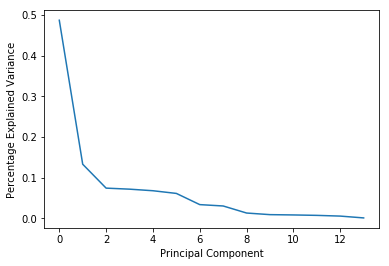

In [50]:
#Standardization of data
std=StandardScaler()
X_std=std.fit_transform(X)

pca_model = PCA(n_components=14)
pca_model.fit(X_std)
print (pca_model.explained_variance_ratio_)
#Plot the explained variance
plt.plot(pca_model.explained_variance_ratio_);
#plt.bar(X.columns, pca_model.explained_variance_)
plt.xlabel('Principal Component');
plt.ylabel('Percentage Explained Variance');

In [51]:
pca = PCA(n_components=2)
pca.fit(X_std)
Transformed_vector =pd.DataFrame( pca.fit_transform(X_std))
xtr,xt,ytr,yt= train_test_split(Transformed_vector,Y,test_size=.3 )

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# Linear Regression on PCA components
lm=LinearRegression()
lm.fit(xtr,ytr)
lm_pca_Preds=lm.predict(X=xt)
lm_pca_rmse=np.sqrt(mean_squared_error(y_pred=lm_pca_Preds,y_true=yt))
lm_pca_r2=metrics.r2_score(yt,lm_pca_Preds)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# RF Regression on PCA components
rf=RandomForestRegressor(max_depth=100,n_estimators=500)
rf.fit(xtr,ytr)
rf_pca_pred=rf.predict(xt)
rf_pca_rmse=np.sqrt(mean_squared_error(y_pred=rf_pca_pred,y_true=yt))
rf_pca_r2=metrics.r2_score(yt,rf_pca_pred)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [54]:
# SVM Regression on PCA components
svr=SVR()
svr.fit(xtr,ytr)
svr_pca_pred=svr.predict(xt)
svr_pca_rmse=np.sqrt(mean_squared_error(y_pred=svr_pca_pred,y_true=yt))
svr_pca_r2=metrics.r2_score(yt,svr_pca_pred)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
print ( 'Null Hypothesis RMSE: '+str(rmse_null))
print ( 'Liner Regression RMSE: '+str(lm_pca_rmse))
print ( 'Random Forest RMSE: '+str(rf_pca_rmse))
print ( 'SVM RMSE: '+str(svr_pca_rmse))
print ( 'Linear Regression R2: '+str(lm_pca_r2))
print ( 'Random Forest R2: '+str(rf_pca_r2))
print ( 'SVM R2: '+str(svr_pca_r2))

Null Hypothesis RMSE: 0.389679791386
Liner Regression RMSE: 0.257269508519
Random Forest RMSE: 0.268656132115
SVM RMSE: 0.248449981405
Linear Regression R2: 0.572509642786
Random Forest R2: 0.533831198436
SVM R2: 0.601317083725


In [ ]:
params={"kernel":('linear','rbf'),"C":[1,50,100],"gamma":[0.03,1,10]}
## Please keep patience, It'll take long time
grid=GridSearchCV(svr,params)
grid_model=grid.fit(Xtrain,ytrain)
grid_model.best_params_
#grid_pred=grid_model.predict(Xtest)
#svr_rmse_grid=np.sqrt(mean_squared_error(y_pred=grid_pred,y_true=ytest))
#svr_rmse_grid

# Conclusion: Linear Regression Model gives the best output based on RMSE and R2 parameters
PCA doesnot improve any performance improvement in this case 